# **1. Perkenalan Dataset**

Dataset yang digunakan adalah **Heart Disease UCI Dataset** (versi Kaggle: *redwankarimsony*). Dataset ini berisi fitur klinis pasien untuk memprediksi indikasi penyakit jantung.

- Jenis masalah: **Klasifikasi biner (hasil konversi dari label ordinal)**
- Label asli: **`num`** dengan rentang **0–4**
  - `num = 0` : **tidak terindikasi** penyakit jantung
  - `num = 1–4` : **terindikasi** penyakit jantung (tingkat keparahan berbeda)
- Label yang digunakan untuk pelatihan (binary): **`target`**
  - `target = 0` : tidak terindikasi (num = 0)
  - `target = 1` : terindikasi (num > 0)

Output kriteria 1: dataset hasil preprocessing yang siap digunakan untuk pelatihan model.

Sumber dataset (Kaggle): https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/Reyfaldho/Eksperimen_SML_Reyfaldho-Alfarazel/refs/heads/main/Heart%20Disease_raw/heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Distribution**

### **Age**

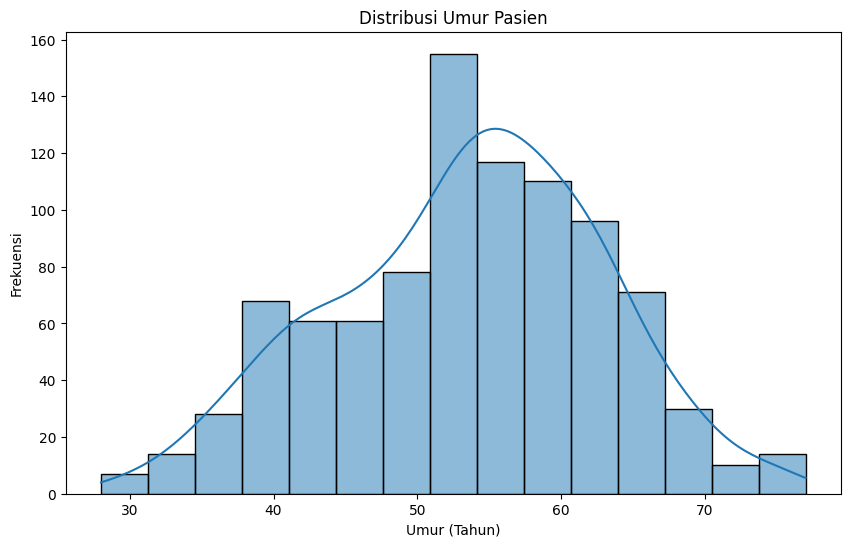

In [106]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=15)
plt.title('Distribusi Umur Pasien')
plt.xlabel('Umur (Tahun)')
plt.ylabel('Frekuensi')
plt.show()

### **Chol**

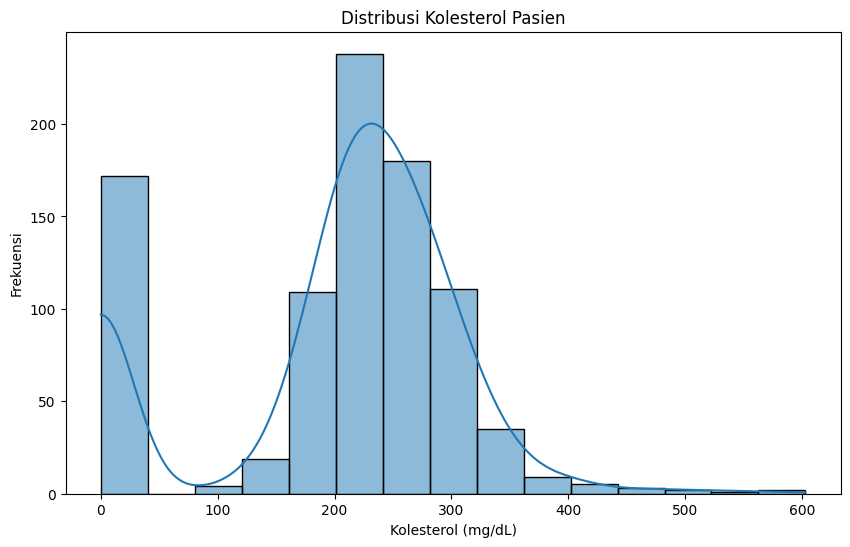

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, bins=15)
plt.title('Distribusi Kolesterol Pasien')
plt.xlabel('Kolesterol (mg/dL)')
plt.ylabel('Frekuensi')
plt.show()

## **Comparison**

### **Sex**

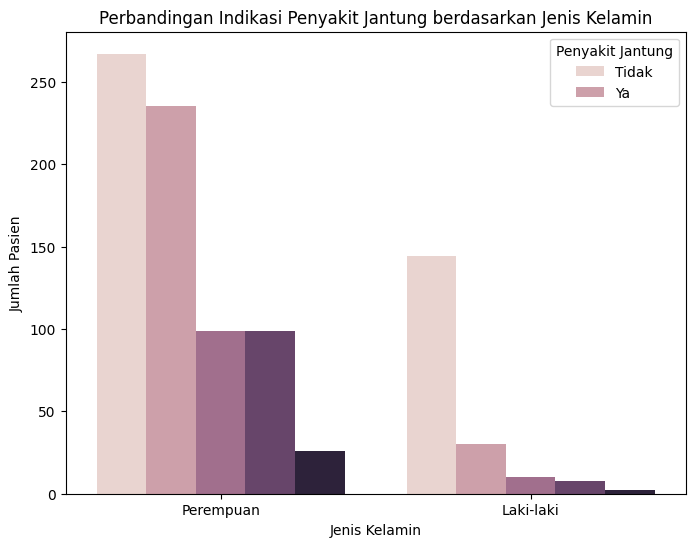

In [108]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='num')
plt.title('Perbandingan Indikasi Penyakit Jantung berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')
plt.xticks(ticks=[0, 1], labels=['Perempuan', 'Laki-laki'])
plt.legend(title='Penyakit Jantung', labels=['Tidak', 'Ya'])
plt.show()

 ### **CP**

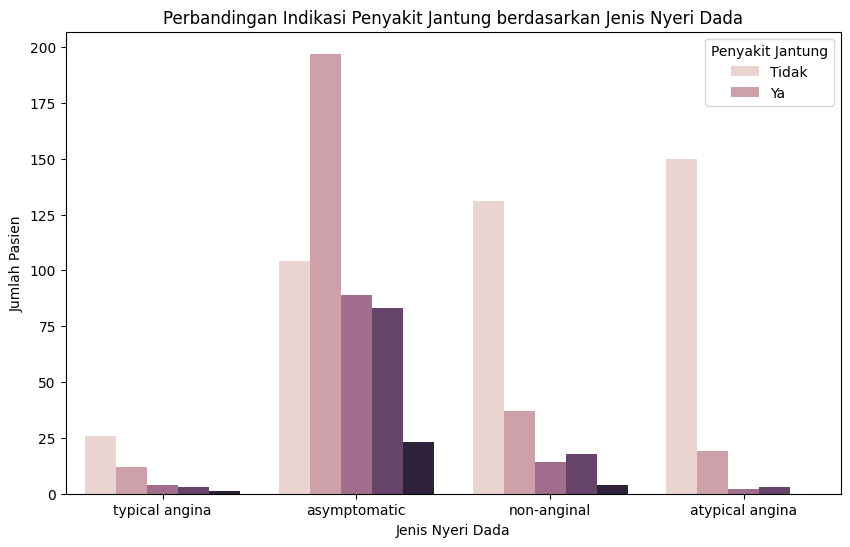

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='num')
plt.title('Perbandingan Indikasi Penyakit Jantung berdasarkan Jenis Nyeri Dada')
plt.xlabel('Jenis Nyeri Dada')
plt.ylabel('Jumlah Pasien')
plt.legend(title='Penyakit Jantung', labels=['Tidak', 'Ya'])
plt.show()

## **Composition**

### **Sex**

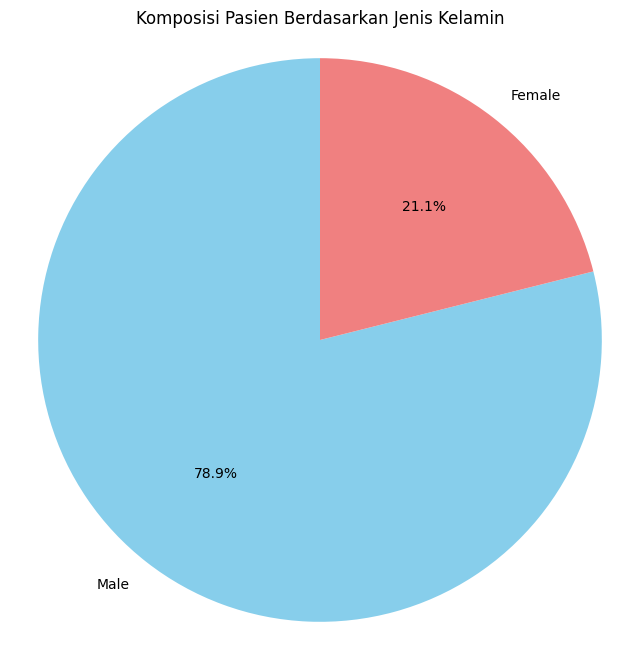

In [110]:
sex_counts = df['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Komposisi Pasien Berdasarkan Jenis Kelamin')
plt.axis('equal')
plt.show()

### **CP**

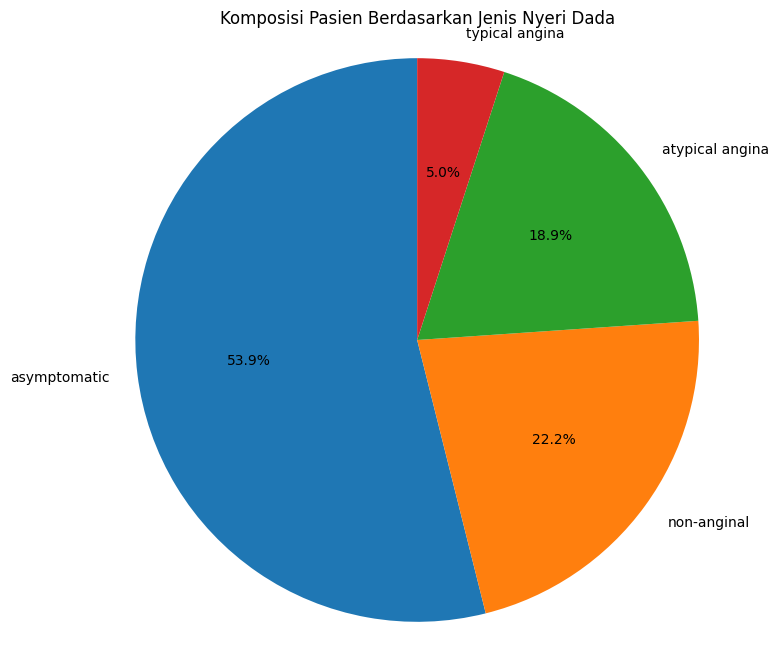

In [111]:
cp_counts = df['cp'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Komposisi Pasien Berdasarkan Jenis Nyeri Dada')
plt.axis('equal')
plt.show()

## **Relationship**

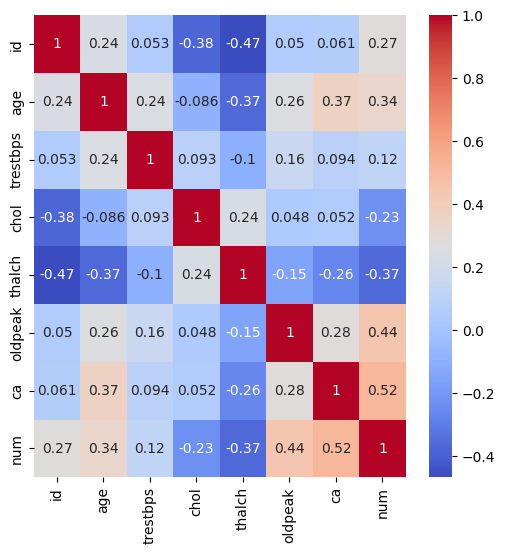

In [112]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **Missing Values**

In [113]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [114]:
numerical_cols = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak'
]
categorical_cols = [
    'sex', 'dataset', 'cp', 'fbs', 'restecg',
    'exang', 'slope', 'ca', 'thal'
]


In [115]:
df_clean = df.copy()

for col in numerical_cols:
    median_value = df_clean[col].median()
    df_clean[col].fillna(median_value, inplace=True)

for col in categorical_cols:
    mode_value = df_clean[col].mode()[0]
    df_clean[col].fillna(mode_value, inplace=True)

df_clean.isna().sum()

/tmp/ipython-input-3791754091.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)
/tmp/ipython-input-3791754091.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


## **Duplicated Values**

In [116]:
df.duplicated().sum()

np.int64(0)

## **Normalisasi atau Standarisasi Fitur**

### **Konversi Label `num` menjadi Label Biner (`target`)**

Pada dataset ini, label `num` merepresentasikan tingkat keparahan penyakit jantung (0–4).  
Agar sesuai dengan **klasifikasi biner**, label dikonversi menjadi `target` dengan aturan:

- `target = 0` jika `num = 0` (tidak terindikasi)
- `target = 1` jika `num > 0` (terindikasi)

Label biner ini akan digunakan pada proses pelatihan model berikutnya.


In [117]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

X = df.drop(columns=['id', 'num'])
y = (df['num'] > 0).astype(int)

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X[numerical_features])
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_features)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_categorical_encoded = encoder.fit_transform(X[categorical_features])
onehot_feature_names = encoder.get_feature_names_out(categorical_features)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded, columns=onehot_feature_names)

processed_df = pd.concat([X_numerical_scaled_df, X_categorical_encoded_df], axis=1)

processed_df['id'] = df['id'].values
processed_df['target'] = y.values
processed_df['num_original'] = df['num'].values

print("Bentuk DataFrame asli:", df.shape)
print("Bentuk DataFrame yang telah diproses:", processed_df.shape)
print("\n5 baris pertama DataFrame yang telah diproses:")
display(processed_df.head())

Bentuk DataFrame asli: (920, 16)
Bentuk DataFrame yang telah diproses: (920, 37)

5 baris pertama DataFrame yang telah diproses:


,age,trestbps,chol,thalch,oldpeak,ca,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,...,slope_flat,slope_upsloping,slope_nan,thal_fixed defect,thal_normal,thal_reversable defect,thal_nan,id,target,num_original
0,1.007386,0.675287,0.305908,0.480653,1.303159,-0.724064,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0
1,1.432034,1.462483,0.784599,-1.140262,0.569611,2.487454,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,1,2
2,1.432034,-0.636705,0.269780,-0.329805,1.578239,1.416948,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3,1,1
3,-1.752828,-0.111908,0.459450,1.908602,2.403480,-0.724064,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,0,0
4,-1.328180,-0.111908,0.043982,1.329704,0.477918,-0.724064,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5,0,0


## **Deteksi dan Penanganan Outlier**

In [118]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results = pd.DataFrame(results)
results.set_index('Kolom', inplace=True)
results = results.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results)

Kolom,Persentase Outliers
id,0.000000
age,0.000000
trestbps,3.043478
chol,19.891304
thalch,0.217391
oldpeak,1.739130
ca,2.173913
num,0.000000


In [119]:
columns_to_fix = [
    'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'
]

for col in columns_to_fix:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [120]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100
    results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results = pd.DataFrame(results)
results.set_index('Kolom', inplace=True)
results = results.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results)

Kolom,Persentase Outliers
id,0.0
age,0.0
trestbps,0.0
chol,0.0
thalch,0.0
oldpeak,0.0
ca,0.0
num,0.0


## **Binning (Pengelompokan Data)**

DataFrame sebelum binning (kolom age):


,age
0,63
1,67
2,67
3,37
4,41



DataFrame setelah binning (kolom age_group):


,age,age_group
0,63,Lanjut Usia
1,67,Lanjut Usia
2,67,Lanjut Usia
3,37,Muda
4,41,Dewasa


/tmp/ipython-input-1140454275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='viridis')


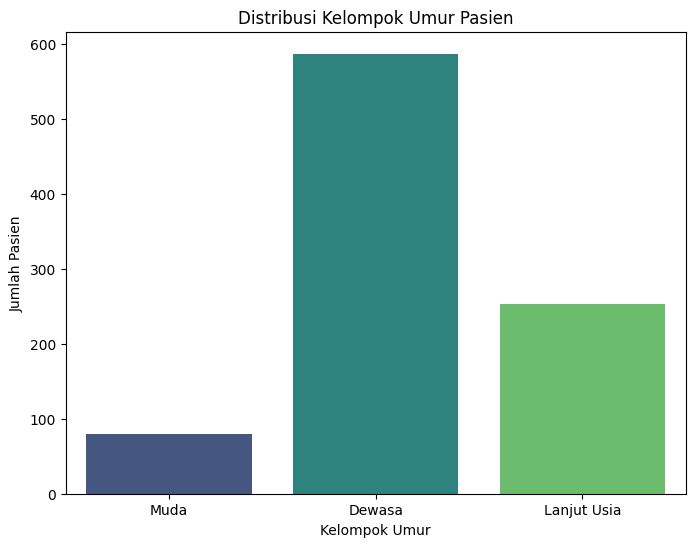

In [121]:
print("DataFrame sebelum binning (kolom age):")
display(df[['age']].head())

bins = [0, 40, 60, 100]
labels = ['Muda', 'Dewasa', 'Lanjut Usia']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("\nDataFrame setelah binning (kolom age_group):")
display(df[['age', 'age_group']].head())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', palette='viridis')
plt.title('Distribusi Kelompok Umur Pasien')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pasien')
plt.show()

In [122]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age_group
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,Lanjut Usia
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2.5,normal,2,Lanjut Usia
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,Lanjut Usia
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,Muda
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,Dewasa


## **Dataset Preprocessing**

In [123]:
processed_df.to_csv('dataset_HeartDisease_membangun_sistem_machine_learning_preprocessing.csv', index=False)
print('Saved:', 'dataset_HeartDisease_membangun_sistem_machine_learning_preprocessing.csv')

Saved: dataset_HeartDisease_membangun_sistem_machine_learning_preprocessing.csv
